In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Download latest version
path = kagglehub.dataset_download("rakannimer/air-passengers")
airline = pd.read_csv(path+'/AirPassengers.csv', parse_dates=["Month"], index_col="Month")

In [4]:
airline.rename(columns={"#Passengers": "Thousands of Passengers"}, inplace=True)

<Axes: xlabel='Month'>

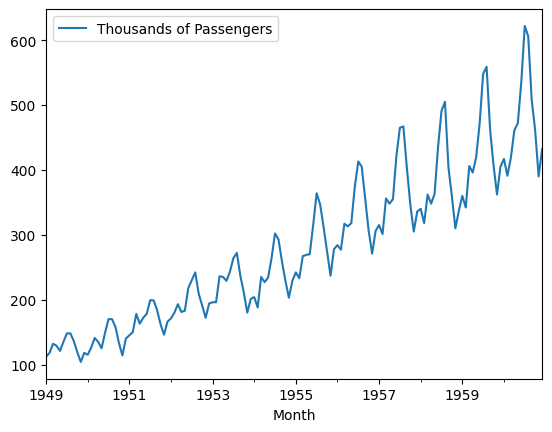

In [5]:
airline.plot()

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(airline["Thousands of Passengers"], model='multiplicative', period=12)

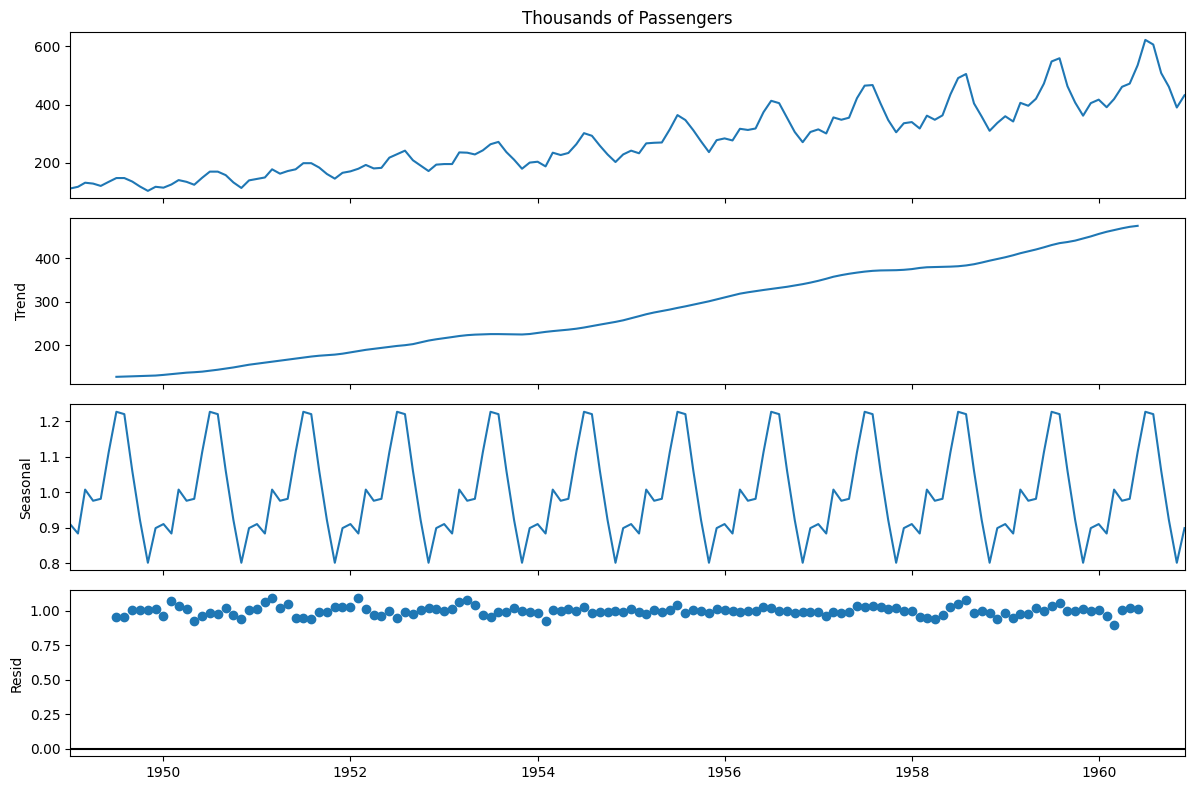

In [7]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
result.plot();

In [8]:
## EWMA Theory and Models
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

<Axes: xlabel='Month'>

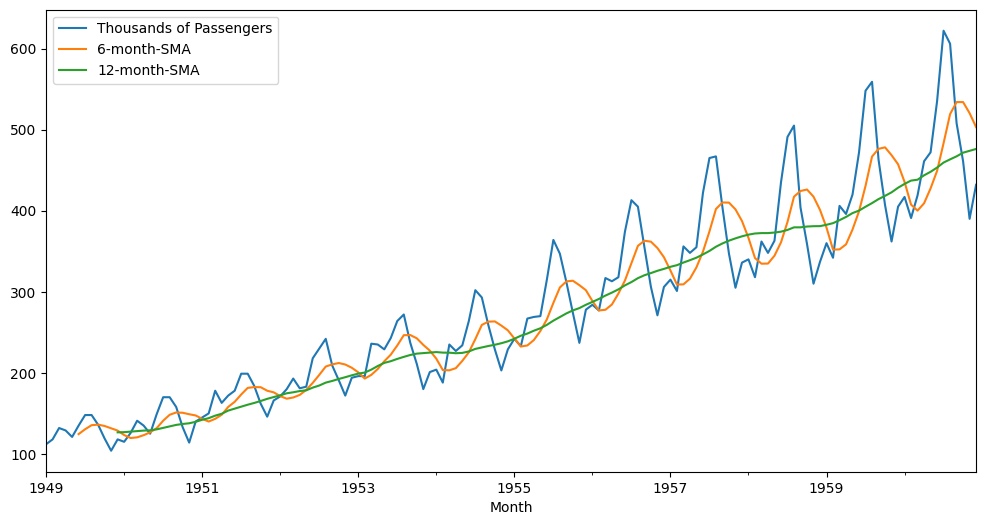

In [9]:
airline.plot(figsize=(12, 6))

In [10]:
airline['EWMA-12'] = airline['Thousands of Passengers'].ewm(span=12, adjust=False).mean()

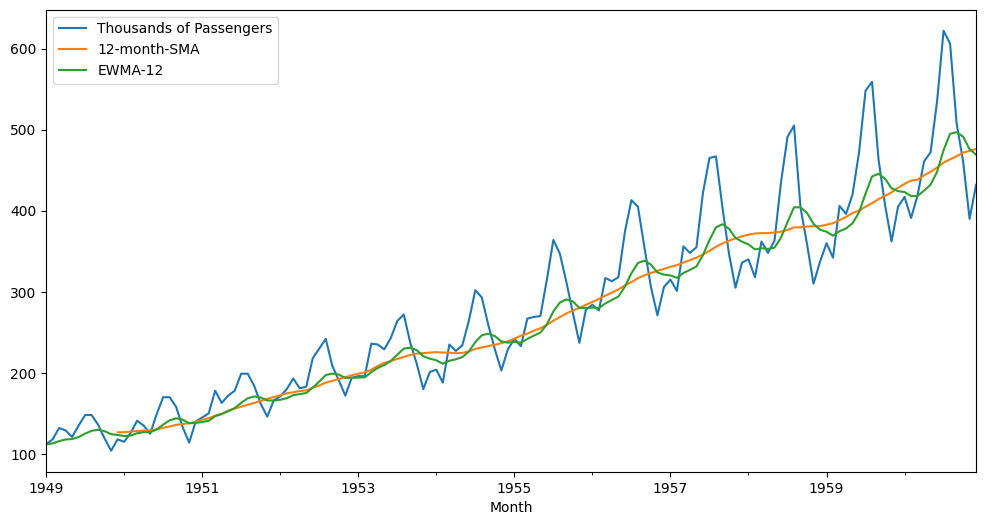

In [11]:
airline[["Thousands of Passengers","12-month-SMA","EWMA-12"]].plot(figsize=(12, 6))
plt.show()

#### Holt-Winters Method

In [12]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing ## Cái này y hệt ewm
span = 12
alpha = 2 / (span + 1)

In [13]:
airline["EWMA12"] = airline["Thousands of Passengers"].ewm(alpha=alpha, adjust=False).mean()

In [14]:
airline.drop(columns=["6-month-SMA", "12-month-SMA", "EWMA-12"], inplace=True)

In [15]:
model = SimpleExpSmoothing(airline["Thousands of Passengers"])

c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [16]:
fitted_model = model.fit(smoothing_level=alpha, optimized=False)

In [17]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
airline["DES_add_12"] = ExponentialSmoothing(airline["Thousands of Passengers"], trend="add", seasonal_periods=12).fit().fittedvalues.shift(-1)

c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [18]:
airline["DES_mul_12"] = ExponentialSmoothing(airline["Thousands of Passengers"], trend="mul", seasonal_periods=12).fit().fittedvalues.shift(-1)

c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

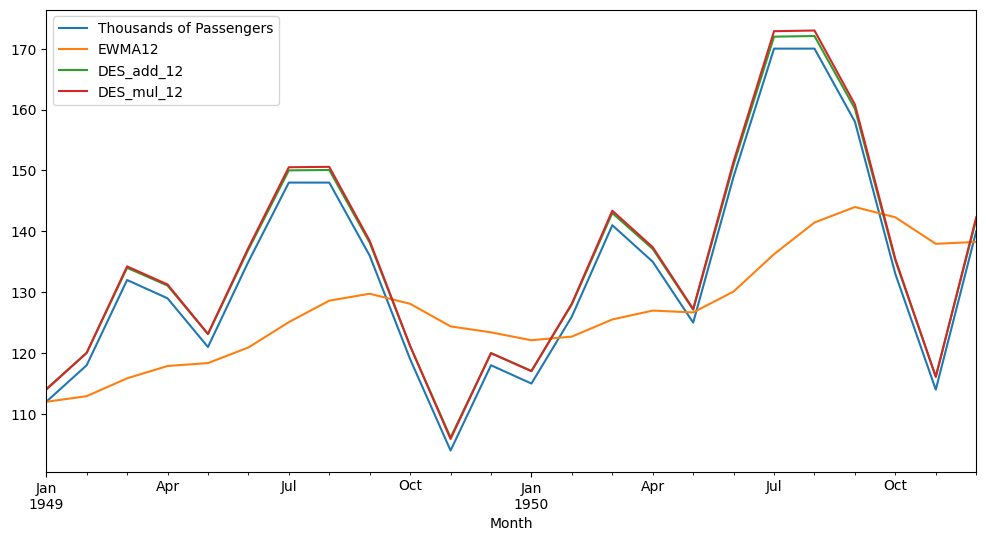

In [19]:
airline.iloc[:24].plot(figsize=(12, 6))

In [20]:
airline["TES_mul_12"] = ExponentialSmoothing(airline["Thousands of Passengers"], trend="mul", seasonal="mul", seasonal_periods=12).fit().fittedvalues.shift(-1)

c:\Users\Asus\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [21]:
airline.columns

Index(['Thousands of Passengers', 'EWMA12', 'DES_add_12', 'DES_mul_12',
       'TES_mul_12'],
      dtype='object')

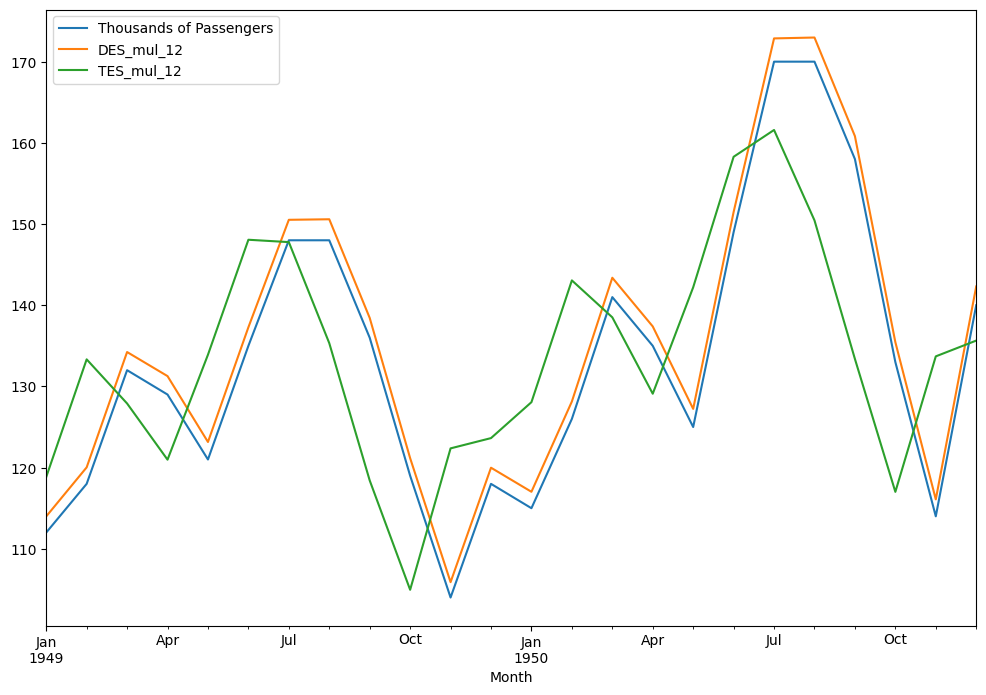

In [22]:
airline[['Thousands of Passengers','DES_mul_12','TES_mul_12']][:24].plot()
plt.show()